Here I will be using some public data of Covid-19 patients in Toronto and doing some exploratory data analysis before comparing key variables gender and age.

The full data set is available at:

https://open.toronto.ca/dataset/covid-19-cases-in-toronto/

This data is part of Toronto's Open Data Master Plan, designed in collaboration with my ex-employer, Montreal open data advocacy non-profit OpenNorth:

https://www.opennorth.ca/

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
ls

COVID19_cases.csv          toronto_covid_cases.ipynb


In [8]:
df = pd.read_csv('COVID19_cases.csv')

Checking the Head shows that we're mostly dealing with object (aka categorical) data here.

In [9]:
df.head()

,_id,Assigned_ID,Outbreak Associated,Age Group,Neighbourhood Name,FSA,Source of Infection,Classification,Episode Date,Reported Date,Client Gender,Outcome,Currently Hospitalized,Currently in ICU,Currently Intubated,Ever Hospitalized,Ever in ICU,Ever Intubated
0,30771,1,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-22,2020-01-23,FEMALE,RESOLVED,No,No,No,No,No,No
1,30772,2,Sporadic,50 to 59 Years,Willowdale East,M2N,Travel,CONFIRMED,2020-01-21,2020-01-23,MALE,RESOLVED,No,No,No,Yes,No,No
2,30773,3,Sporadic,20 to 29 Years,Parkwoods-Donalda,M3A,Travel,CONFIRMED,2020-02-05,2020-02-21,FEMALE,RESOLVED,No,No,No,No,No,No
3,30774,4,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-16,2020-02-25,FEMALE,RESOLVED,No,No,No,No,No,No
4,30775,5,Sporadic,60 to 69 Years,Church-Yonge Corridor,M4W,Travel,CONFIRMED,2020-02-20,2020-02-26,MALE,RESOLVED,No,No,No,No,No,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15540 entries, 0 to 15539
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   _id                     15540 non-null  int64 
 1   Assigned_ID             15540 non-null  int64 
 2   Outbreak Associated     15540 non-null  object
 3   Age Group               15513 non-null  object
 4   Neighbourhood Name      14934 non-null  object
 5   FSA                     14981 non-null  object
 6   Source of Infection     15540 non-null  object
 7   Classification          15540 non-null  object
 8   Episode Date            15540 non-null  object
 9   Reported Date           15540 non-null  object
 10  Client Gender           15540 non-null  object
 11  Outcome                 15540 non-null  object
 12  Currently Hospitalized  15540 non-null  object
 13  Currently in ICU        15540 non-null  object
 14  Currently Intubated     15540 non-null  object
 15  Ev

Let's check for missing data

In [11]:
df['Outbreak Associated'].value_counts(dropna=True)

Sporadic               9733
Outbreak Associated    5807
Name: Outbreak Associated, dtype: int64

I noticed that there is a gap between the 15540 records and the 14934 values in Neighbourhood Name. That sounds like null (NaN) values.

In [12]:
df['Neighbourhood Name'].value_counts(dropna=False).head(10)

NaN                                  606
Glenfield-Jane Heights               513
Mount Olive-Silverstone-Jamestown    503
West Humber-Clairville               501
Downsview-Roding-CFB                 461
York University Heights              428
Islington-City Centre West           356
Weston                               328
Rouge                                312
Black Creek                          308
Name: Neighbourhood Name, dtype: int64

Yes indeed - a full 606 of them! That column, the Age Group and FSA columns all appear to have null values, which may not be a deal-breaker but it is worth bearing in mind.

Let's see our Client Genders:

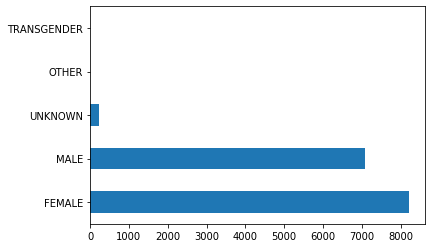

In [13]:
df['Client Gender'].value_counts().plot(kind='barh')

...and where people caught it:

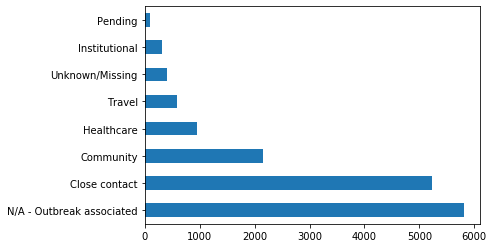

In [14]:
df['Source of Infection'].value_counts().plot(kind='barh')

...and whether it was associated with a general outbreak or a specific event:

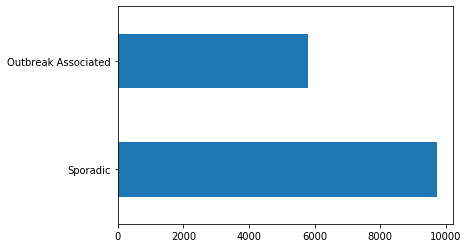

In [15]:
df['Outbreak Associated'].value_counts().plot(kind='barh')

What is/was the outcome?

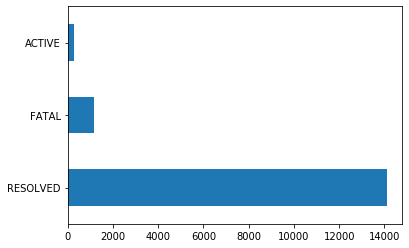

In [16]:
df['Outcome'].value_counts().plot(kind='barh')

Let's try it by gender and see if that tells us anything. First by female, then male:

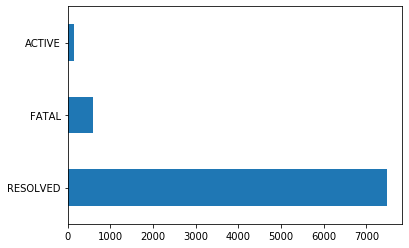

In [17]:
df[df['Client Gender'] == 'FEMALE']['Outcome'].value_counts().plot(kind='barh')

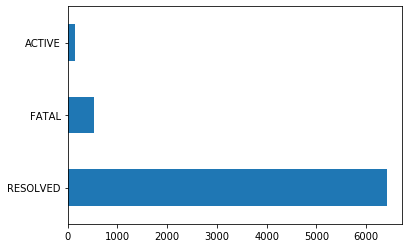

In [18]:
df[df['Client Gender'] == 'MALE']['Outcome'].value_counts().plot(kind='barh')

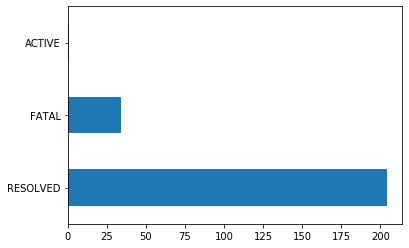

In [19]:
df[df['Client Gender'] == 'UNKNOWN']['Outcome'].value_counts().plot(kind='barh')

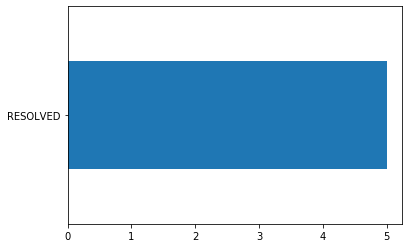

In [25]:
df[df['Client Gender'] == 'TRANSGENDER']['Outcome'].value_counts().plot(kind='barh')

All in all, Male and Female are pretty comparable. Unknown leans more toward fatal outcomes, which could be worth noting, but this is a small data set, as is Transgender.

Let's check distribution across age groups.

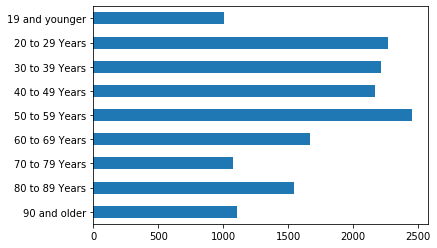

In [20]:
df['Age Group'].value_counts().sort_index(ascending=False).plot(kind='barh', sort_columns=False)

Let's try some contingency table analysis to compare various variables. First we will look at Client Gender vs Age Group.

In [21]:
pd.crosstab(df['Age Group'], df['Client Gender'], margins = False, normalize='index').round(4)*100

Client Gender,FEMALE,MALE,OTHER,TRANSGENDER,UNKNOWN
Age Group,,,,,
19 and younger,45.92,50.90,0.00,0.00,3.19
20 to 29 Years,46.85,52.36,0.00,0.04,0.75
30 to 39 Years,48.96,49.95,0.05,0.14,0.90
40 to 49 Years,53.57,45.05,0.09,0.05,1.24
50 to 59 Years,54.58,44.81,0.08,0.00,0.53
60 to 69 Years,48.33,50.60,0.00,0.00,1.08
70 to 79 Years,48.69,49.63,0.09,0.00,1.59
80 to 89 Years,62.01,34.69,0.00,0.00,3.30
90 and older,72.32,23.72,0.00,0.00,3.97


There are more female patients over 80, but that correlates with the general population.

Now let's see if the Source of Infection changes by different age groups:

In [22]:
pd.crosstab(df['Age Group'], df['Source of Infection'], margins = False, normalize='index').round(4)*100

Source of Infection,Close contact,Community,Healthcare,Institutional,N/A - Outbreak associated,Pending,Travel,Unknown/Missing
Age Group,,,,,,,,
19 and younger,74.90,8.17,2.89,0.60,9.56,0.70,1.89,1.29
20 to 29 Years,51.04,17.63,5.29,1.76,15.51,0.79,4.28,3.70
30 to 39 Years,38.58,17.87,8.57,2.35,23.78,0.81,5.01,3.02
40 to 49 Years,36.48,17.13,7.74,2.99,28.42,0.74,3.82,2.67
50 to 59 Years,34.30,17.80,7.17,2.81,30.35,0.69,4.03,2.85
60 to 69 Years,29.37,15.19,7.83,2.39,34.57,0.84,6.46,3.35
70 to 79 Years,18.38,11.85,6.72,1.31,54.38,0.37,4.85,2.15
80 to 89 Years,5.70,4.60,3.82,0.84,82.52,0.13,1.23,1.17
90 and older,2.71,1.17,0.54,1.44,92.88,0.00,0.27,0.99


Clearly under-19s are more likely to get it from Close contact, while over-80s it's associated with a general outbreak.

Let's check Outcome by Age Group, first as percentages:

In [23]:
pd.crosstab(df['Age Group'], df['Outcome'], margins = False, normalize='index').round(4)*100

Outcome,ACTIVE,FATAL,RESOLVED
Age Group,,,
19 and younger,3.88,0.10,96.02
20 to 29 Years,2.20,0.04,97.75
30 to 39 Years,1.94,0.05,98.01
40 to 49 Years,1.29,0.41,98.30
50 to 59 Years,1.75,1.38,96.86
60 to 69 Years,2.03,6.46,91.51
70 to 79 Years,1.40,20.15,78.45
80 to 89 Years,1.23,26.67,72.10
90 and older,0.81,34.36,64.83


...now as raw numbers:

In [24]:
pd.crosstab(df['Age Group'], df['Outcome'], margins = False)

Outcome,ACTIVE,FATAL,RESOLVED
Age Group,,,
19 and younger,39,1,964
20 to 29 Years,50,1,2218
30 to 39 Years,43,1,2172
40 to 49 Years,28,9,2134
50 to 59 Years,43,34,2378
60 to 69 Years,34,108,1530
70 to 79 Years,15,216,841
80 to 89 Years,19,412,1114
90 and older,9,381,719


This definitely supports the belief that the older you are the more dangerous COVID-19 is.